In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Criando o dataset (adicione mais dados conforme necessário)
data = pd.DataFrame({
    'clientes': ['cliente 2', 'cliente 5', 'cliente 1', 'cliente 1', 'cliente 7',
                 'cliente 3', 'cliente 4', 'cliente 6', 'cliente 5', 'cliente 7',
                 'cliente 2', 'cliente 6', 'cliente 7', 'cliente 1', 'cliente 3',
                 'cliente 4', 'cliente 2', 'cliente 5'],
    'Valor_compra': [378, 475, 285, 181, 177, 250, 320, 410, 391, 115, 
                     156, 46, 329, 200, 350, 420, 180, 290],
    'qtde_produtos': [10, 18, 10, 4, 20, 8, 12, 15, 2, 16, 
                      12, 19, 11, 5, 14, 17, 6, 9],
    'forma_pag': [1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 
                  0, 0, 0, 0, 1, 1, 0, 1]
})

data.head(10)

,clientes,Valor_compra,qtde_produtos,forma_pag
0,cliente 2,378,10,1
1,cliente 5,475,18,1
2,cliente 1,285,10,1
3,cliente 1,181,4,0
4,cliente 7,177,20,1
5,cliente 3,250,8,0
6,cliente 4,320,12,1
7,cliente 6,410,15,1
8,cliente 5,391,2,0
9,cliente 7,115,16,0


In [3]:
# Separando características (X) e rótulo (y)
X = data[['Valor_compra', 'qtde_produtos']]
y = data['forma_pag']

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)
print("\nDistribuição das classes:")
print(y.value_counts())

Shape de X: (18, 2)
Shape de y: (18,)

Distribuição das classes:
forma_pag
1    9
0    9
Name: count, dtype: int64


In [4]:
# Dividindo em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

Tamanho do conjunto de treino: 12
Tamanho do conjunto de teste: 6


In [5]:
# Treinando o modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

print("Modelo treinado com sucesso!")

Modelo treinado com sucesso!


In [6]:
# Fazendo previsões
y_pred = svm_model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do Modelo SVM: {accuracy:.2f}')
print('\nRelatório de Classificação:')
print(classification_report(y_test, y_pred, target_names=['Cartão (0)', 'PIX (1)']))

Acurácia do Modelo SVM: 0.83

Relatório de Classificação:
              precision    recall  f1-score   support

  Cartão (0)       1.00      0.75      0.86         4
     PIX (1)       0.67      1.00      0.80         2

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



Matriz de Confusão:
[[3 1]
 [0 2]]


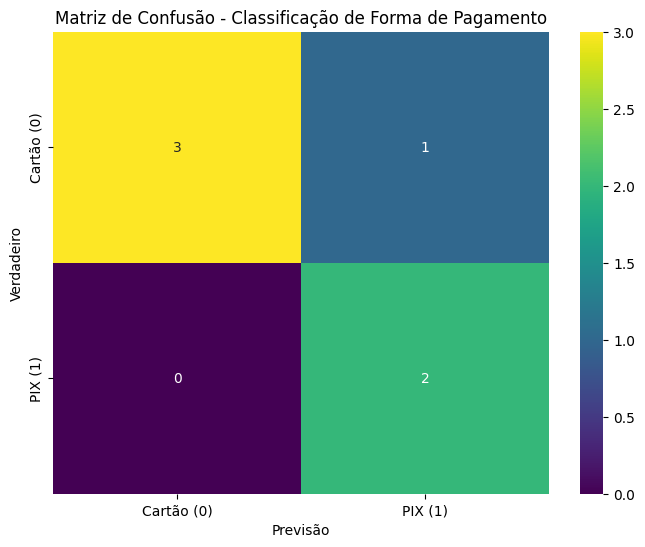

In [7]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(cm)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
            xticklabels=['Cartão (0)', 'PIX (1)'], 
            yticklabels=['Cartão (0)', 'PIX (1)'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Classificação de Forma de Pagamento')
plt.show()

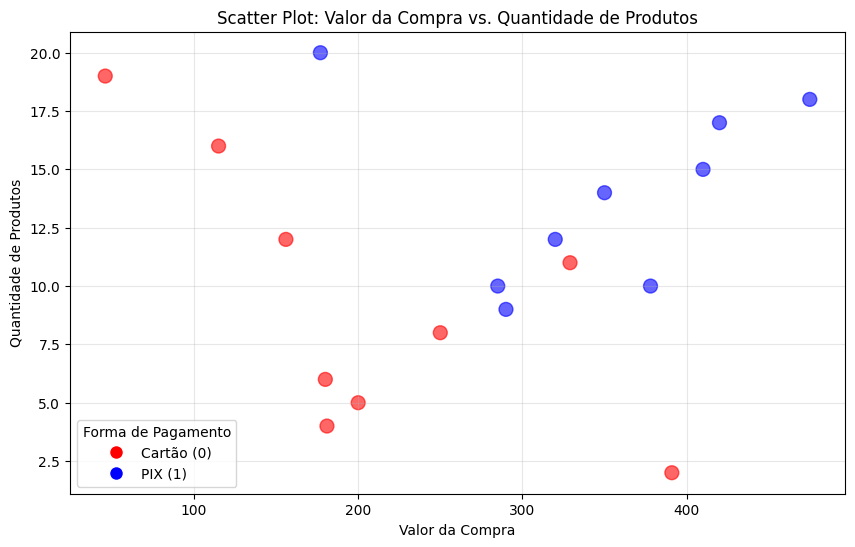

In [8]:
# Visualização dos dados
plt.figure(figsize=(10, 6))
colors = ['red' if x == 0 else 'blue' for x in data['forma_pag']]
plt.scatter(data['Valor_compra'], data['qtde_produtos'], c=colors, alpha=0.6, s=100)
plt.title('Scatter Plot: Valor da Compra vs. Quantidade de Produtos')
plt.xlabel('Valor da Compra')
plt.ylabel('Quantidade de Produtos')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', 
                               markerfacecolor='r', markersize=10, label='Cartão (0)'),
                   plt.Line2D([0], [0], marker='o', color='w', 
                               markerfacecolor='b', markersize=10, label='PIX (1)')],
          title='Forma de Pagamento')
plt.grid(True, alpha=0.3)
plt.show()